### Проект 2. Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса **Яндекс.Недвижимость** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
Нужно научиться определять рыночную стоимость объектов недвижимости.  
Ваша задача — установить параметры.  
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных.  
Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.  
Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

##### Описание данных :

**total_images** — число фотографий квартиры в объявлении 

**last_price** — цена на момент снятия с публикации  

**total_area** — площадь квартиры в квадратных метрах (м²) 

**first_day_exposition** — дата публикации  

**rooms** — число комнат  

**ceiling_height** — высота потолков (м)  

**floors_total** — всего этажей в доме  

**floor** — этаж  

**is_apartment** — апартаменты (булев тип)  

**living_area** — жилая площадь в квадратных метрах(м²)  

**open_plan** — свободная планировка (булев тип)  

**studio** — квартира-студия (булев тип)  

**locality_name** — название населённого пункта  

**kitchen_area** — площадь кухни в квадратных метрах (м²)  

**balcony** — число балконов   

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)   

**cityCenters_nearest** — расстояние до центра города (м)   

**parks_around3000** — число парков в радиусе 3 км  

**parks_nearest** — расстояние до ближайшего парка (м)  

**ponds_around3000** — число водоёмов в радиусе 3 км   

**ponds_nearest** — расстояние до ближайшего водоёма (м)  

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)   



  
 
   

  

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.  

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 

Стоит также добавить оглавление с ссылочной навигацией, маркдаун может и такое :)
    
Я дам тебе ссылки на полезные гайды, которые могут помочь:
    
<a href="https://markdown-guide.readthedocs.io/en/latest/basics.html">guide1.</a>
<a href="https://paulradzkov.com/2014/markdown_cheatsheet/">guide2.</a>
    
А также советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования. 
    
</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Оглавление сделала! Спасибо за рекомендации!
</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию <a name="step1"></a>

# Оглавление
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)
2. [Шаг 2. Предобработка данных](#step2)  
    0.[План предобработки данных](#plan_predobrabotka)  
    1.[Число фотографий квартиры в объявлении: 'total_images'](#total_images)   
    2.[Цена на момент снятия с публикации:'last_price'](#last_price)  
    3.[Площадь квартиры в квадратных метрах (м²): 'total_area'](#total_area)  
    4.[Дата публикации: 'first_day_exposition'](#first_day_exposition)   
    5.[Число комнат: rooms](#rooms)  
    6.[Высота потолков (м): ceiling_height](#ceiling_height)  
    7.[Всего этажей в доме: floors_total](#floors_total)  
    8.[Жилая площадь в квадратных метрах(м²): living_area](#living_area)  
    9.[Этаж: floor](#floor)  
    10.[Апартаменты (булев тип): is_apartment](#is_apartment)   
    11.[Свободная планировка (булев тип): studio](#studio)   
    12.[Квартира-студия (булев тип): open_plan](#open_plan)   
    13.[Название населённого пункта: locality_name](#locality_name)   
    14.[Площадь кухни в квадратных метрах (м²): kitchen_area](#kitchen_area)   
    15.[Число балконов: balcony](#balcony)   
    16.[Расстояние до ближайшего аэропорта в метрах (м): airports_nearest](#airports_nearest)   
    17.[Расстояние до центра города (м): cityCenters_nearest](#cityCenters_nearest)  
    18.[Число парков в радиусе 3 км: parks_around3000](#parks_around3000)  
    19.[Расстояние до ближайшего парка (м): parks_nearest](#parks_nearest)   
    20.[Число водоёмов в радиусе 3 км: ponds_around3000](#ponds_around3000)   
    21.[Расстояние до ближайшего водоёма (м): ponds_nearest](#ponds_nearest)  
    22.[Cколько дней было размещено объявление (от публикации до снятия): days_exposition](#days_exposition)  
    23.[Вывод по предобработке данных](#conclusion_predobrabotka)
3. [Шаг 3. Добавление новых признаков в таблицу](#step3)  
    1.[Цена квадратного метра](#price_per_square_meter)  
    2.[День недели, месяц и год публикации объявления](#Day_of_week_month_and_year_when_the_ad_was_published)  
    3.[Этаж квартиры; варианты — первый, последний, другой](#apartment_floor_options_first_last_other)  
    4.[Cоотношение жилой и общей площади, а также отношение площади кухни к общей.](#the_ratio_of_living_space_and_total_area)
4. [Шаг 4. Исследовательский анализ данных](#exploratory_data_analysis)  
    1.[Изучение  площади, цены, числа комнат, высоты потолков](#area_price_number_of_rooms_ceiling_height)  
    2.[Изучение факторов влияния на стоимость квартиры.](#factors_price)
5. [Шаг 5. Общий вывод](#conclusion_all)

In [157]:
#здесь располагаются все импорты программного кода
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('real_estate_data.csv', sep='\t')

Рассмотрим головную часть датасета:
                            

In [158]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Теперь данные прочитаны верно.**

Воспользуюсь методом **describe()** и **info()**, тем самым узнаемобщую информацию о нашем датасете:

In [159]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В прочитанном файле **22** столбца и **23698** строк.  

### Вывод:


В датасете **Яндекс.Недвижимости** имеем 22 признака на 23698 строк, описание данных представлено выше.   
На первый взгляд можно заметить, что имеются пропуски в следующих признаках:    
    * ceiling_height;  
    * floors_total;  
    * living_area;  
    * is_apartment;  
    * kitchen_area;  
    * balcony;  
    * locality_name;  
    * airports_nearest;  
    * cityCenters_nearest;  
    * parks_around3000;  
    * parks_nearest;  
    * ponds_around3000;  
    * ponds_nearest;  
    * days_exposition.  

Очевидно, что тип данных не соответствует действительности признака **first_day_exposition**.  
Более подробно рассмотрю признаки ниже.     
    

### Шаг 2. Предобработка данных <a name="step2"></a>

##### План для предобработки данных <a name="plan_predobrabotka"></a> 

- [x]  определить и изучить пропущенные значения
- [x]  заполнить пропуски, где это уместно
- [x]  описать, почему было принято решение заполнить пропуски именно в этих столбцах и как выбирались значения
- [x]  указать причины, которые могли привести к пропускам в данных
- [x]  привести данные к нужным типам
- [x]  пояснить, в каких столбцах нужно изменить тип данных и почему

**Рассмотрю все признаки**

##### 1. 'total_images' - число фотографий квартиры в объявлении  <a name="total_images"></a> 

In [161]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

**Вывод по признаку 'total_images'**: 
* тип данных **int64**, менять не стоит на другой тип, так как количество фотографий характеризуется целым числом;
* пропущенных значений нет
    

##### 2. 'last_price' — цена на момент снятия с публикации  <a name="last_price"></a> 

In [162]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [163]:
data.query('last_price==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Вывод по признаку 'last_price'**: 
* Имеет тип данных **float64**. Менять тип данных не буду, так как это цена и человеку, который продает квартиру, она важна до капейки :) 
* Пропущенных значений нет.

##### 3. 'total_area' — площадь квартиры в квадратных метрах (м²)  <a name="total_area"></a> 

In [164]:
#округляю до двух знаков после запятой
data['total_area']=np.around(data['total_area'], decimals = 2)

In [165]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [166]:
data.query('total_area<0 or total_area==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Вывод по признаку 'total_area'**: 
* Имеет тип данных **float64**. Менять тип данных не будем, так как бывают квартиры например '43,7' $м^2$, но округлю значения признака до двух знаков после запятой
* Пропущенных значений нет

##### 4. first_day_exposition — дата публикации  <a name="first_day_exposition"></a> 

In [167]:
data['first_day_exposition'].isnull().sum()

0

In [168]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Даты были переведены в читабельный формат.  
Проверю, изменился ли тип данных.  

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Вывод по признаку 'first_day_exposition'**:
* В типе данных указан тип **'object'**, поменяла его на **datetime64[ns]**.
* Пропущенных значений нет

##### 5. rooms — число комнат   <a name="rooms"></a> 

In [170]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Вижу, что в данных присутствуют значения, равные **'0'**, таких **197**.    
Делаю предположение, что пользователи при занесении данных в Яндекс.  Недвижимость по ошибке указали **'0'** комнат вместо **1**.    
Сделаю сводную табличку по трем параметрам: **'open_plan'**, **'is_apartment'**, **'studio'**.  



In [171]:
data.pivot_table(index='rooms',values=['studio'],aggfunc='count')

,studio
rooms,
0,197
1,8047
2,7940
3,5814
4,1180
5,326
6,105
7,59
8,12


**'0'** это не пропущенное значение, а ошибка пользователя, при заполнении пункта **'rooms'**, так квартирка-студия.

Заменю значение 0 на значение 1.

In [172]:
data['rooms']=data['rooms'].replace(0,1)

In [173]:
data.query('rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Сделаю категоризацию для признака **rooms**

In [174]:
def rooms_category(count):
    rooms = {
        1: 'однокомнатная/студия',
        2: 'двухкомнатная',
        3: 'трехкомнатная',
    }

    return rooms.get(count, 'четырехкомнатная+')

In [175]:
data['rooms_category']=data['rooms'].apply(rooms_category)
data['rooms_category'].value_counts()

однокомнатная/студия    8244
двухкомнатная           7940
трехкомнатная           5814
четырехкомнатная+       1701
Name: rooms_category, dtype: int64

**Вывод по признаку rooms**:
* Тип данных **'int64'** указан верно.
* Пропущенных значений нет

##### 6. ceiling_height — высота потолков (м)  <a name="ceiling_height"></a> 

In [176]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Наблюдаю, что по признаку 61% пропущенных значений.

In [177]:
data['ceiling_height']=data['ceiling_height'].fillna(0)

In [178]:
data.ceiling_height.isnull().sum()

0

**Вывод по признаку ceiling_height**:
* Тип данных **'float64'** указан верно.
* Пропущенных значения были заменены на 0, что означает, что их нет.

##### 7. floors_total — всего этажей в доме <a name="floors_total"></a> 

In [179]:
data['floors_total'].isnull().sum() 

86

Пропущенных значений 0,36%. Так как количество этажей не указано и я никак не смогу это узнать. Заменять NaN буду на 0. 

In [180]:
data['floors_total']=data['floors_total'].fillna(value=0)

In [181]:
data['floors_total']=data['floors_total'].astype('int')


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Вывод по признаку floors_total**:
* Тип данных **'float64'** поменяла на **int64**.
* Пропущенных значения были заменены на 0, что означает, что данных нет.

##### 8. living_area — жилая площадь в квадратных метрах(м²) <a name="living_area"></a> 

In [183]:
data.living_area.isnull().sum()

1903

Пропущенных значений 8 %, заменю их медианным значением по признаку **room_category**.

In [184]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [185]:
data.loc[data['living_area'].isnull(), 'living_area'] = data['living_area'].median()

In [186]:
data['living_area'].isnull().sum()

0

In [187]:
data['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

**Вывод по признаку living_area**:
* Тип данных **'float64'**.
* Пропущенных значения были заменены на медианное значение.

##### 9. floor — этаж <a name="floor"></a> 

In [188]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Вывод по признаку floor**:
* Тип данных **'int64'**.
* Пропущенных значений не обнаружено.

##### 10. is_apartment — апартаменты (булев тип) <a name="is_apartment"></a> 

Данный признак в исследовании не рассматривается. Заменю пропущенные значения на пустую строку.

In [189]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [190]:
data['is_apartment'].isnull().sum()

20924

In [191]:
data['is_apartment']=data['is_apartment'].fillna(value=' ')

In [192]:
data['is_apartment'].isnull().sum()

0

In [193]:
data['is_apartment']=data['is_apartment'].astype('bool')

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Данный параметр не понадобится при исследовании, могу предположить, что данные не были занесены в результирующую таблицу. Поэтому необходимо обратится к людям, которые занимаются выгрузкой и указать на ошибку в данных,чтобы в дальнейшей работе не было таких проблем. 
А пока заменю пропущенные значения на пробел и поменяем тип данных **object** на **bool**.

**Вывод по признаку is_apartment**:
* Тип данных **'object' был изменен на 'bool'**.
* Пропущенных значения заменены на пробел.

##### 11. studio -свободная планировка (булев тип) <a name="studio"></a> 

Оставляю без изменений

##### 12. open_plan - квартира-студия (булев тип) <a name="open_plan"></a> 

Оставляю без изменений

##### 13.locality_name — название населённого пункта <a name="locality_name"></a> 

In [195]:
data['locality_name'].isnull().sum()

49

Пропущенных значений 0.2%.

Можно заметить, что в названиях населенного пункта часто появляется буква 'ё' в слове 'посёлок', целесообразной по правилам русского языка будет замена на букву 'е'.

In [196]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [197]:
data['locality_name']=data['locality_name'].str.replace('ё','е', regex=True)

In [198]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [199]:
data['locality_name']=data['locality_name'].fillna(' ')

In [200]:
data['locality_name'].isnull().sum()

0

In [201]:
len(data['locality_name'].unique())

331

##### 14. kitchen_area — площадь кухни в квадратных метрах (м²) <a name="kitchen_area"></a> 

In [202]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [203]:
data['kitchen_area'].isnull().sum()

2278

Пропущенных значений 9.6%.

In [204]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data['kitchen_area'].median()

In [205]:
data['kitchen_area'].isnull().sum()

0

##### 15. balcony — число балконов <a name="balcony"></a> 

In [206]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [207]:
data['balcony'].isnull().sum()

11519

Пропущенных значений 48%.

In [208]:
data['balcony']=data['balcony'].fillna(value=0)

In [209]:
data['balcony'].isnull().sum()

0

##### 16. airports_nearest — расстояние до ближайшего аэропорта в метрах (м) <a name="airports_nearest"></a> 

In [210]:
data['airports_nearest'].isnull().sum()

5542

Пропущенных значений 23%

In [211]:
data.pivot_table(index='locality_name',values='airports_nearest',aggfunc='median')

,airports_nearest
locality_name,
,22041.0
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25715.5
Кронштадт,67850.0
Ломоносов,48415.5
Павловск,20529.5
Петергоф,39231.0
Пушкин,15766.0


In [212]:
med_airports_nearest = data.groupby('locality_name')['airports_nearest'].transform('median')
#заменяем пропуски медианой по каждой группе
data['airports_nearest'] = data['airports_nearest'].fillna(med_airports_nearest)

In [213]:
data['airports_nearest'].isnull().sum()

4864

Пропущенных значений 20.5 %

##### 17. cityCenters_nearest — расстояние до центра города (м) <a name="cityCenters_nearest"></a> 

In [214]:
data['cityCenters_nearest'].isnull().sum()

5519

Пропущенных значений 23.28%

In [215]:
data.pivot_table(index='locality_name',values='cityCenters_nearest',aggfunc='median')

,cityCenters_nearest
locality_name,
,8943.0
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29140.5
Кронштадт,49575.0
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5


In [216]:
med_cityCentres_nearest = data.groupby('locality_name')['cityCenters_nearest'].transform('median')
#заменяем пропуски медианой по каждой группе
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(med_cityCentres_nearest)

In [217]:
data['cityCenters_nearest'].isnull().sum()

4864

Пропущенных значений 20.5 %.

##### 18. parks_around3000 — число парков в радиусе 3 км <a name="parks_around3000"></a> 

In [218]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [219]:
data['parks_around3000'].isnull().sum()

5518

Пропущенных значений 23.28%

Данные не участвуют в исследовании, заменю пропущенные значения на пробел

In [220]:
data['parks_around3000']=data['parks_around3000'].fillna(value='')

In [221]:
data['parks_around3000'].isnull().sum()

0

##### 19. parks_nearest — расстояние до ближайшего парка (м) <a name="parks_nearest"></a> 

In [222]:
data['parks_nearest'].isnull().sum()

15620

Пропущенных значений 65.9%.

In [223]:
data['parks_nearest']=data['parks_nearest'].fillna(value='')

In [224]:
data['parks_nearest'].isnull().sum()

0

##### 20.ponds_around3000 — число водоёмов в радиусе 3 км <a name="ponds_around3000"></a> 

In [225]:
data['ponds_around3000'].isnull().sum()

5518

Пропущенных значений 23.28%

Данные не участвуют в исследовании, заменю пропущенные значения на пробел

In [226]:
data['ponds_around3000']=data['ponds_around3000'].fillna(value='')

In [227]:
data['ponds_around3000'].isnull().sum()

0

##### 21. ponds_nearest — расстояние до ближайшего водоёма (м) <a name="ponds_nearest"></a> 

In [228]:
data['ponds_nearest'].isnull().sum()

14589

Пропущенных значений 61.5%

Данные не участвуют в исследовании, заменю пропущенные значения на пробел

In [229]:
data['ponds_nearest']=data['ponds_nearest'].fillna(value='')

In [230]:
data['ponds_nearest'].isnull().sum()

0

##### 22. days_exposition - сколько дней было размещено объявление (от публикации до снятия) <a name="days_exposition"></a> 

In [231]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [232]:
data['days_exposition'].isnull().sum()

3181

Около 13 процентов пропущенных значений, поэтому будем заменять их медианой, это самый безопасный метод для всей выборки.

In [233]:
median_days_exposition=data['days_exposition'].median()

In [234]:
data['days_exposition']=data['days_exposition'].fillna(value=median_days_exposition)

In [235]:
data.days_exposition.describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пропущенные значения были успешно заменены на медиану. Теперь необходимо поменять тип данных **float64** на **int64**.

In [236]:
data['days_exposition']=data['days_exposition'].astype('int')

Проверю, сработал ли метод.

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

##### Проверка на дубликаты:

In [238]:
data.duplicated().sum()

0

### Вывод по предобработке данных: <a name="conclusion_predobrabotka"></a>

В ходе предобработки данных:  
* обнаружены пропущенные значения в признаках: 
    * ceiling_height: **61%**
    * floors_total: **0.36%**
    * living_area: **8%**
    * is_apartment: **88%**
    * locality_name **0.2%**
    * kitchen_area **9.6%**
    * balcony **48%**
    * airports_nearest **23%**
    * cityCenters_nearest **23.28%**
    * parks_around3000 **23.28%**
    * parks_nearest **65.9%** 
    * ponds_around3000 **23.28%**
    * ponds_nearest **61.5%**
    * days_exposition **13%**
* заменены пропущенные значения на:
    * ceiling_height: **'0'**, 
    * living_area: **медианное значение**
    * locality_name: **пустая строка**
    * kitchen_area: **медианное значение**
    * balcony: **'0'**
    * airports_nearest: **медианой по каждой группе locality_name**
    * cityCenters_nearest: **медианой по каждой группе locality_name**
    * days_exposition: **медиана** 
* заменены типы данных:
    * first_day_exposition: **object на datetime64[ns]**
    * floors_total: **float64 на int64**
    * is_apartment: **object на bool**
    * days_exposition: **float64 на int64**
    
 
**Пропущенные значения остальных признаков были заменены на пустую строку, так как эти данные в исследованиях не используются.**
    
    

### Шаг 3. Добавление новых признаков в таблицу <a name="step3"></a>

Посчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

##### 3.1. Цена квадратного метра <a name="price_per_square_meter"></a>

In [239]:
data['price_per_square_meter']=data['last_price']/data['total_area']

##### 3.2. День недели, месяц и год публикации объявления <a name="Day_of_week_month_and_year_when_the_ad_was_published"></a>

In [240]:
data['day_of_week']=data['first_day_exposition'].dt.dayofweek

In [241]:
def day_of_week(dataset):
    if dataset['day_of_week']==1:
        return 'monday'
    elif dataset['day_of_week']==2:
        return 'tuesday'
    elif dataset['day_of_week']==3:
        return 'wednesday'
    elif dataset['day_of_week']==4:
        return 'thursday'
    elif dataset['day_of_week']==5:
        return 'friday'
    elif dataset['day_of_week']==6:
        return 'saturday'
    else:
        return 'sunday'
        

In [242]:
data['day_of_week'] = data.apply(day_of_week,axis=1)

In [243]:
data['day_of_week'].value_counts()

wednesday    4295
monday       4183
thursday     4000
tuesday      3974
sunday       3612
friday       1936
saturday     1699
Name: day_of_week, dtype: int64

In [244]:
data['day']=data['first_day_exposition'].dt.dayofweek

Теперь узнаем какой месяц

In [245]:
data['month']=data['first_day_exposition'].dt.month

In [246]:
def month(dataset):
    if dataset['month']==1:
        return 'january'
    elif dataset['month']==2:
        return 'february'
    elif dataset['month']==3:
        return 'march'
    elif dataset['month']==4:
        return 'april '
    elif dataset['month']==5:
        return 'may'
    elif dataset['month']==6:
        return 'june'
    elif dataset['month']==7:
        return 'july'
    elif dataset['month']==8:
        return 'august '
    elif dataset['month']==9:
        return 'september'
    elif dataset['month']==10:
        return 'october'
    elif dataset['month']==11:
        return 'november'
    else:
        return 'december'
        

In [247]:
data['month_of_year'] = data.apply(month,axis=1)

In [248]:
data['month_of_year'].value_counts()

february     2640
march        2587
april        2379
november     2371
october      2127
september    1981
june         1760
august       1744
july         1695
december     1641
january      1500
may          1274
Name: month_of_year, dtype: int64

In [249]:
data['month']=data['first_day_exposition'].dt.month

In [250]:
data['year']=data['first_day_exposition'].dt.year

##### 3.3 Этаж квартиры; варианты — первый, последний, другой <a name="apartment_floor_options_first_last_other"></a>

In [251]:
def floor_category(dataset):
    if dataset['floor'] == 1:
        return 'первый'
    elif dataset['floor'] == dataset['floors_total']:
        return 'последний'
    else: 
        return 'другой'       

In [252]:
data['floor_category'] = data.apply(floor_category,axis=1)

In [253]:
data['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

##### 3.4. Cоотношение жилой и общей площади, а также отношение площади кухни к общей. <a name="the_ratio_of_living_space_and_total_area"></a>

In [254]:
data['ratio_of_living_and_total_area']=data['living_area']/data['total_area']

In [255]:
data['ratio_of_kitchen_and_total_area']=data['kitchen_area']/data['total_area']

### Шаг 4. Исследовательский анализ данных  <a name="exploratory_data_analysis"></a>

##### 4.1. Изучение  площади, цены, числа комнат, высоты потолков. <a name="area_price_number_of_rooms_ceiling_height"></a>

##### Площадь квартиры в квадратных метрах

Построю ящик с усами, чтобы обозначить границы выбросов:

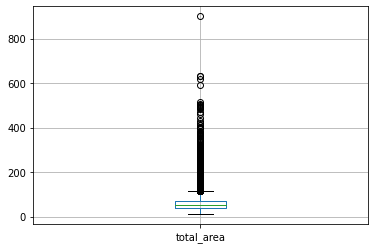

In [256]:
data.boxplot('total_area')

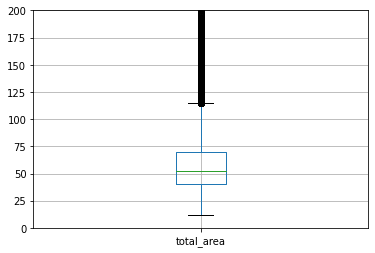

In [257]:
plt.ylim(0,200)
data.boxplot('total_area')

In [258]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Нижняя границы нормального размаха соответствует min: '12'.

Создам функцию для вычисления **верхней границы нормального размаха**:

In [259]:
def upper (q1,q3):
    interquartile_range=q3-q1
    upper_mustache=q3+1.5*interquartile_range
    return upper_mustache

In [260]:
upper(40,69.9)

114.75000000000001

**Промежуточный вывод:**  
* нижний ус упирается в значение '12'
* верхний ус упирается в значение '114.75'
* все что лежит за границами нормального размаха будет выбросом

Создаю переменную **new_total_area**, которая будет соответствовать границам нормального размаха:

In [261]:
new_total_area=data.query('total_area >= 12 & total_area <=114.75')

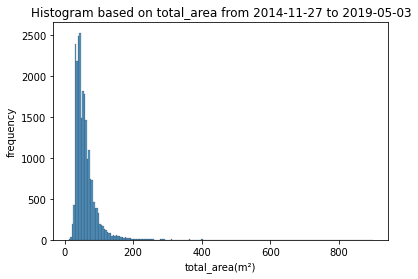

Text(0.5, 1.0, 'Histogram based on total_area without outliers from 2014-11-27 to 2019-05-03')

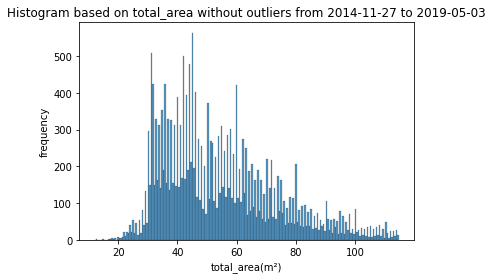

In [262]:
import seaborn as sns
plt.ylabel('frequency')
plt.xlabel('total_area(m²)')
sns.histplot(data=data,x="total_area",bins=200).set_title('Histogram based on total_area from 2014-11-27 to 2019-05-03')
plt.show()
plt.ylabel('frequency')
plt.xlabel('total_area(m²)')
sns.histplot(data=new_total_area,x="total_area",bins=200).set_title('Histogram based on total_area without outliers from 2014-11-27 to 2019-05-03')

В далнейших исследованиях буду рассматривать **new_total_area**.

##### Цена

In [263]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

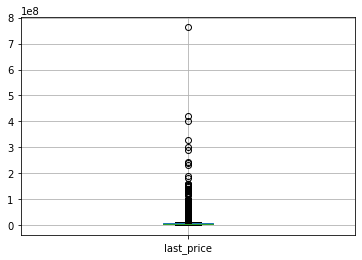

In [264]:
data.boxplot('last_price')

In [265]:
upper(3.4e+06,6.8e+06)

11900000.0

**Промежуточный вывод:**  
* нижний ус упирается в значение '12190'
* верхний ус упирается в значение '11900000'
* все что лежит за границами нормального размаха будет выбросом

Создаю переменную **new_last_price**, которая будет соответствовать границам нормального размаха:

In [266]:
new_last_price=data.query('last_price <= 11900000')

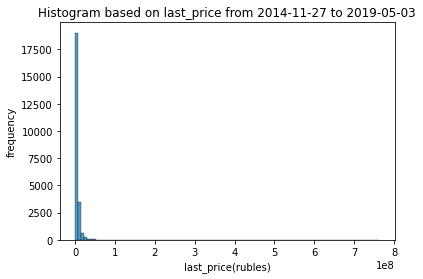

Text(0.5, 1.0, 'Histogram based on last_price without outliers from 2014-11-27 to 2019-05-03')

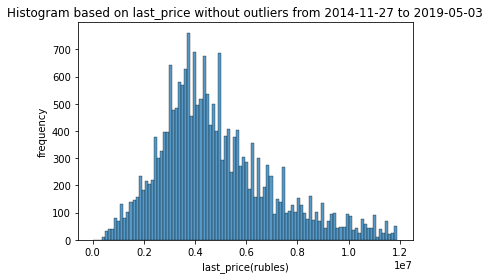

In [267]:
plt.ylabel('frequency')
plt.xlabel('last_price(rubles)')
sns.histplot(data=data,x="last_price",bins=100).set_title('Histogram based on last_price from 2014-11-27 to 2019-05-03')
plt.show()
plt.ylabel('frequency')
plt.xlabel('last_price(rubles)')
sns.histplot(data=new_last_price,x="last_price",bins=100).set_title('Histogram based on last_price without outliers from 2014-11-27 to 2019-05-03')

В далнейших исследованиях будем рассматривать **new_last_price**.

##### Число комнат

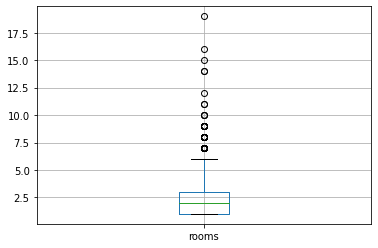

In [268]:
data.boxplot('rooms')

In [269]:
data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Нижняя граница нормального размаха: **'1'**

In [270]:
upper(1,3)

6.0

Верхняя граница нормального размаха: **'6'**.  
Все что находится за пределами будем считать выбросами.

In [271]:
new_rooms=data.query('rooms >= 1 & rooms<=6')

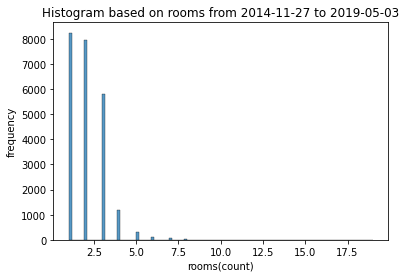

Text(0.5, 1.0, 'Histogram based on rooms without outliers from 2014-11-27 to 2019-05-03')

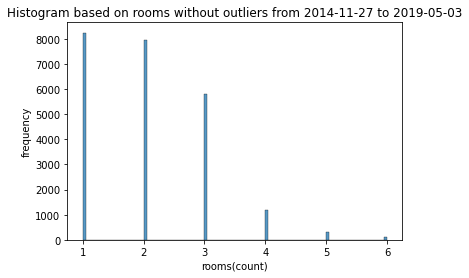

In [272]:
plt.ylabel('frequency')
plt.xlabel('rooms(count)')
sns.histplot(data=data,x="rooms",bins=100).set_title('Histogram based on rooms from 2014-11-27 to 2019-05-03')
plt.show()
plt.ylabel('frequency')
plt.xlabel('rooms(count)')
sns.histplot(data=new_rooms,x="rooms",bins=100).set_title('Histogram based on rooms without outliers from 2014-11-27 to 2019-05-03')

В дальнейших исследованиях будем рассматривать **new_rooms**

##### Высота потолков

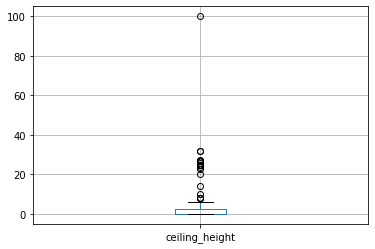

In [273]:
data.boxplot('ceiling_height')

In [274]:
data['ceiling_height'].describe()

count    23699.000000
mean         1.696182
std          1.672495
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Нижний ус упирается в значение '1'. Но по строительным нормам высота потолка должна быть не ниже 2.4

In [275]:
upper(2.52,2.8)

3.2199999999999998

Верхний ус в значение '3.219'

In [276]:
new_ceiling_height=data.query('ceiling_height >= 2.52 & ceiling_height <= 3.219')

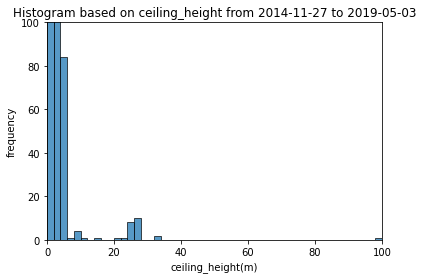

Text(0.5, 1.0, 'Histogram based on ceiling_height without outliers from 2014-11-27 to 2019-05-03')

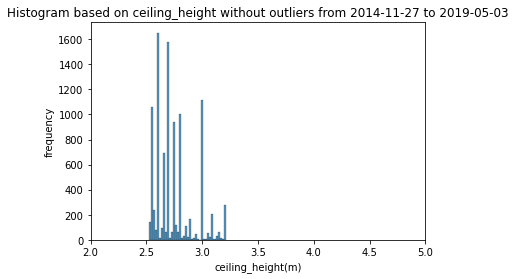

In [277]:
plt.xlim(0,100)
plt.ylim(0,100)
plt.ylabel('frequency')
plt.xlabel('ceiling_height(m)')
sns.histplot(data=data,x="ceiling_height",bins=50).set_title('Histogram based on ceiling_height from 2014-11-27 to 2019-05-03')

plt.show()

plt.ylabel('frequency')
plt.xlabel('ceiling_height(m)')
plt.xlim(2,5)
sns.histplot(data=new_ceiling_height,x="ceiling_height").set_title('Histogram based on ceiling_height without outliers from 2014-11-27 to 2019-05-03')

В дальнейших исследованиях будем рассматривать **new_ceiling_height**.

* 4.2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [278]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [279]:
days_exposition_median=data['days_exposition'].median()
print(days_exposition_median)

95.0


In [280]:
upper(45,199)

430.0

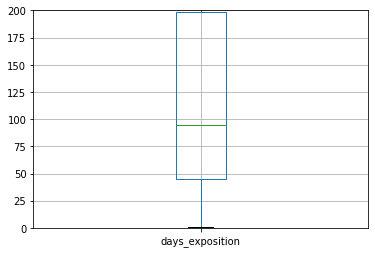

In [281]:
plt.ylim(0,200)
data.boxplot('days_exposition')

Промежуточный вывод:
* нижний ус упирается в значение 1, то. есть 1 день;
* верхний ус упирается в значение 430, то есть чуть больше года;
* продажи идут необычно долго, начиная от 200 дней.

In [282]:
new_days_exposition=data.query('days_exposition >= 1.0 & days_exposition <= 430.0')

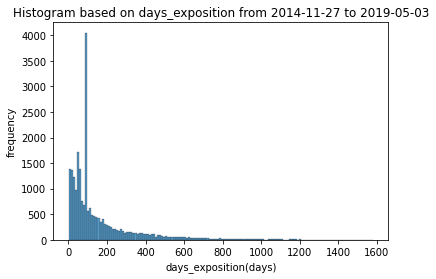

Text(0.5, 1.0, 'Histogram based on days_exposition without outliers from 2014-11-27 to 2019-05-03')

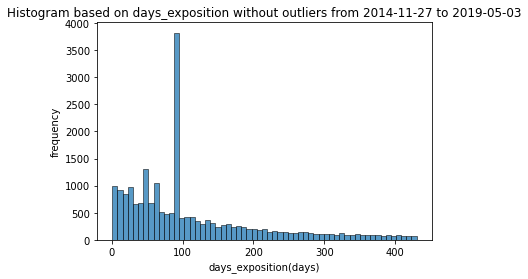

In [283]:
plt.ylabel('frequency')
plt.xlabel('days_exposition(days)')
sns.histplot(data=data,x="days_exposition").set_title('Histogram based on days_exposition from 2014-11-27 to 2019-05-03')

plt.show()

plt.ylabel('frequency')
plt.xlabel('days_exposition(days)')
sns.histplot(data=new_days_exposition,x="days_exposition").set_title('Histogram based on days_exposition without outliers from 2014-11-27 to 2019-05-03')

##### 4.2. Изучение факторов влияния на стоимость квартиры. <a name="factors_price"></a>

##### Зависимость цены недвижимости от цены квадратного метра

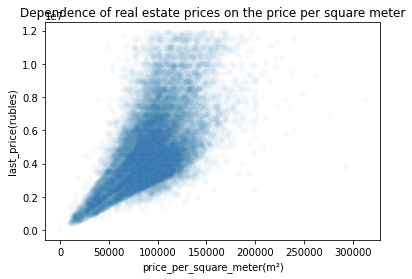

In [284]:
plt.ylabel('last_price(rubles)')
plt.xlabel('price_per_square_meter(m²)')
sns.scatterplot(data=new_last_price,x="price_per_square_meter",y="last_price",alpha=0.03).set_title('Dependence of real estate prices on the price per square meter')
plt.show()


In [285]:
new_last_price['price_per_square_meter'].corr(new_last_price['last_price'])

0.6087903767373609

**Вывод:**  
По графику и коэффициенту Пирсона, могу утверждать, что зависимость цены от цены квадратного метра есть, так как коэффициент равен 0.6, можно сказать,что зависимость не слабая.

##### Зависимость стоимости недвижимости от числа комнат

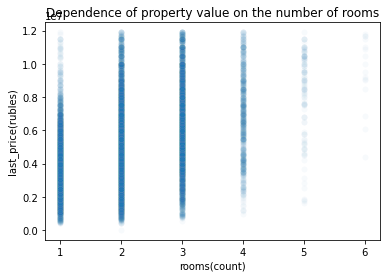

In [286]:
dependence_rooms_price=data.query('rooms >= 1 & rooms <= 6 & last_price <= 11900000')
plt.ylabel('last_price(rubles)')
plt.xlabel('rooms(count)')
sns.scatterplot(data=dependence_rooms_price,x="rooms",y="last_price",alpha=0.03).set_title('Dependence of property value on the number of rooms')
plt.show()

In [287]:
dependence_rooms_price['rooms'].corr(dependence_rooms_price['last_price'])

0.4514129733468776

**Вывод:**  
По графику и коэффициенту Пирсона, могу утверждать, что зависимость цены недвижимости от числа комнат, так как коэффициент равен 0.45, можно сказать,что зависимость слабая.

##### Зависимость стоимости недвижимости от этажа

In [288]:

data[['floor_category', 'last_price']].query('last_price <= 11900000').pivot_table(index='floor_category', values='last_price') 

,last_price
floor_category,
другой,5.044224e+06
первый,4.126973e+06
последний,4.489907e+06


**Вывод:**  
Дешевле всего купить недвижимость на первом этаже, дороже всего на любом, кроме первого и последнего.

##### Зависимость стоимости недвижимости от расстояние до центра города (м)

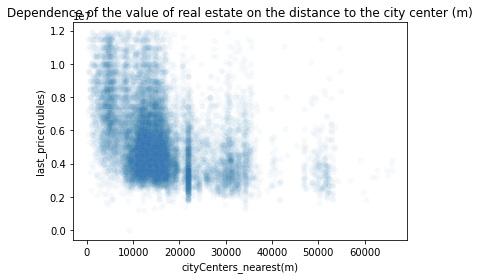

In [289]:
plt.ylabel('last_price(rubles)')
plt.xlabel('cityCenters_nearest(m)')
sns.scatterplot(data=new_last_price,x="cityCenters_nearest",y="last_price",alpha=0.03).set_title('Dependence of the value of real estate on the distance to the city center (m)')
plt.show()

In [290]:
new_last_price['cityCenters_nearest'].corr(new_last_price['last_price'])

-0.3604276198861437

**Вывод:**  
Есть слабая зависимость между стоимостью недвижимости и расстояния до центра.  
Чем ближе к центру, тем дороже.  

##### Зависимость стоимости недвижимости от даты публикации объявления

In [291]:
depedence_price_date=data.query('last_price <= 11900000 & days_exposition >= 1.0 & days_exposition <= 430.0')

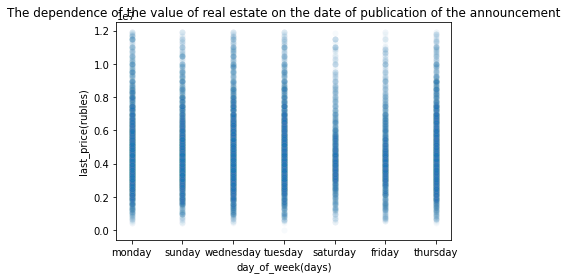

In [292]:
plt.ylabel('last_price(rubles)')
plt.xlabel('day_of_week(days)')
sns.scatterplot(data=depedence_price_date,x="day_of_week",y="last_price",alpha=0.03).set_title('The dependence of the value of real estate on the date of publication of the announcement')
plt.show()

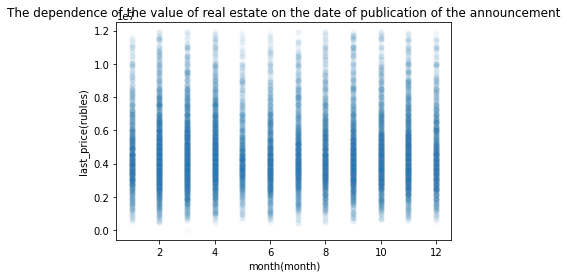

In [293]:
plt.ylabel('last_price(rubles)')
plt.xlabel('month(month)')
sns.scatterplot(data=depedence_price_date,x="month",y="last_price",alpha=0.03).set_title('The dependence of the value of real estate on the date of publication of the announcement')
plt.show()

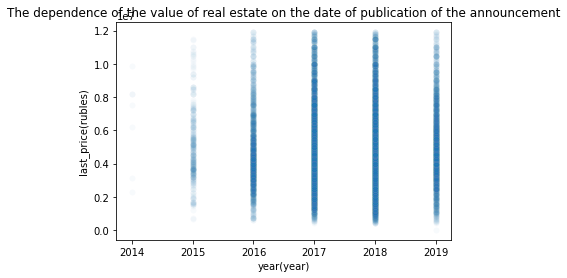

In [294]:
plt.ylabel('last_price(rubles)')
plt.xlabel('year(year)')
sns.scatterplot(data=depedence_price_date,x="year",y="last_price",alpha=0.03).set_title('The dependence of the value of real estate on the date of publication of the announcement')
plt.show()

In [295]:
depedence_price_date[['day', 'month', 'year', 'last_price']].corr()

,day,month,year,last_price
day,1.000000,0.012164,-0.013877,-0.013534
month,0.012164,1.000000,-0.307363,0.003440
year,-0.013877,-0.307363,1.000000,0.029320
last_price,-0.013534,0.003440,0.029320,1.000000


**Вывод:**  
Cлабая зависимость между стоимостью недвижимости и днем, месяцем, годом. Коэффициент Пирсона практически равен 0.  
Максимальная зависимость между стоимостью недвижимости и годом.

##### Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [296]:
top=data['locality_name'].value_counts().head(10)

In [297]:
print(top)

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


In [298]:
top = list(top.index)

In [299]:
(
    data.query('locality_name in @top and last_price <= 11900000')
    .groupby('locality_name').agg({'locality_name':'count','price_per_square_meter':'mean'})
    .sort_values(by='price_per_square_meter', ascending=False)
)


,locality_name,price_per_square_meter
locality_name,,
Санкт-Петербург,13763,105474.924791
Пушкин,339,100322.823868
деревня Кудрово,298,92409.726322
поселок Парголово,327,90175.913458
поселок Мурино,556,85681.762601
поселок Шушары,440,78677.364217
Колпино,336,75185.478229
Гатчина,305,68421.902770
Всеволожск,397,67214.252635


**Вывод:**  
Самый дорогой квадратный метр в Санкт-Петербурге, самый дешевый в Выборге.

In [300]:
spb = pd.DataFrame(data.loc[data['locality_name'] == "Санкт-Петербург"])
spb.reset_index()
len(spb)

15721

In [301]:
spb['cityCenters_nearest_km'] = (spb['cityCenters_nearest'] / 1000)


In [302]:
spb['cityCenters_nearest_km']=spb['cityCenters_nearest_km'].astype('int')

In [303]:
spb_price = spb.query('last_price <= 11900000')
spb_price.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0,8.346372e+06
1,8.160774e+06
2,7.654493e+06
3,7.443970e+06
4,7.754978e+06
5,7.383655e+06
6,6.840485e+06
7,6.714581e+06
8,6.292329e+06


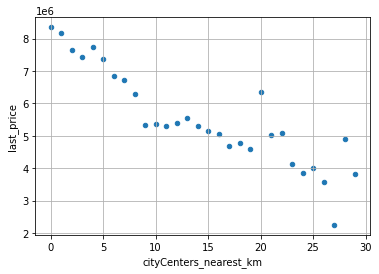

In [304]:
(
pd.DataFrame(spb_price.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', grid=True)
)
plt.show()

Резкий скачок наблюдается от 8 км. Все что будет до 8 км - центр.

In [305]:
center = pd.DataFrame(spb_price.query('cityCenters_nearest_km <= 8'))
len(center)

3002

##### Площадь

In [306]:
center.query('total_area >= 12 & total_area <=114.75')['total_area'].describe()

count    2908.00000
mean       62.65804
std        20.71949
min        12.00000
25%        46.00000
50%        60.87000
75%        77.00000
max       114.30000
Name: total_area, dtype: float64

##### Вывод:  
Средняя площадь 62.65 квадратных метров.

##### Цена

In [307]:
center['last_price'].describe()

count    3.002000e+03
mean     7.200692e+06
std      2.266472e+06
min      1.600000e+06
25%      5.500000e+06
50%      7.000000e+06
75%      8.900000e+06
max      1.190000e+07
Name: last_price, dtype: float64

##### Вывод:
Средняя цена 7.2 млн рублей    

##### Количество комнат

In [308]:
center.query('rooms>=1 and rooms<=6')['rooms'].describe()

count    3002.000000
mean        2.284144
std         1.003597
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

##### Вывод:
В объявлениях представлены двухкомнатные и трехкомнатные квартиры

##### Высота потолков

In [309]:
center.query('ceiling_height >= 2.52 & ceiling_height <= 3.219')['ceiling_height'].describe()

count    1383.000000
mean        2.907274
std         0.188035
min         2.520000
25%         2.750000
50%         2.950000
75%         3.000000
max         3.210000
Name: ceiling_height, dtype: float64

##### Вывод:
Средняя высота потолков 2.9

In [310]:
new_data=center.query('total_area >= 12 & total_area <=114.75 & rooms>=1 and rooms<=6 & ceiling_height >= 2.52 & ceiling_height <= 3.219 & days_exposition >= 1.0 & days_exposition <= 430.0 ')


In [311]:
new_data.pivot_table(index='floor_category', values='last_price').sort_values(by='last_price')

,last_price
floor_category,
первый,6.374321e+06
последний,7.197890e+06
другой,7.387854e+06


##### Вывод:  
В Санкт-Петербурге дешевле всего брать квартиру на 1 этаже, как и во всех населенных пунктах.

In [312]:

features = [
    'last_price',
    'cityCenters_nearest_km',
    'total_area',
    'rooms',
    'ceiling_height',
    'day',
    'month',
    'year'
]

new_data[features].corr().sort_values('last_price', ascending=False)

,last_price,cityCenters_nearest_km,total_area,rooms,ceiling_height,day,month,year
last_price,1.000000,-0.125705,0.683721,0.457409,0.204101,-0.032067,0.010273,0.006289
total_area,0.683721,-0.155061,1.000000,0.816046,0.261833,-0.072959,0.023717,-0.068156
rooms,0.457409,-0.165831,0.816046,1.000000,0.223721,-0.050283,0.023186,-0.035363
ceiling_height,0.204101,-0.240997,0.261833,0.223721,1.000000,-0.060112,-0.024915,-0.035370
month,0.010273,-0.055467,0.023717,0.023186,-0.024915,0.046169,1.000000,-0.383501
year,0.006289,0.060628,-0.068156,-0.035363,-0.035370,0.033171,-0.383501,1.000000
day,-0.032067,0.018430,-0.072959,-0.050283,-0.060112,1.000000,0.046169,0.033171
cityCenters_nearest_km,-0.125705,1.000000,-0.155061,-0.165831,-0.240997,0.018430,-0.055467,0.060628


##### Шаг 5. Общий вывод <a name="conclusion_all"></a>
* Факторы, влияющие на стоимость:
  * количество комнат;
  * площадь;
  * высота потолков; 
*  День, месяц, год не влияет на стоимость.
* Дороже всего стоят квартиры, расположенные на этажах между первым и последним, дешевле всего квартиры, расположенные на первом этаже.
* Чем ближе к центру, тем дороже.